**Author: Nicholas Bradford**

### Problem

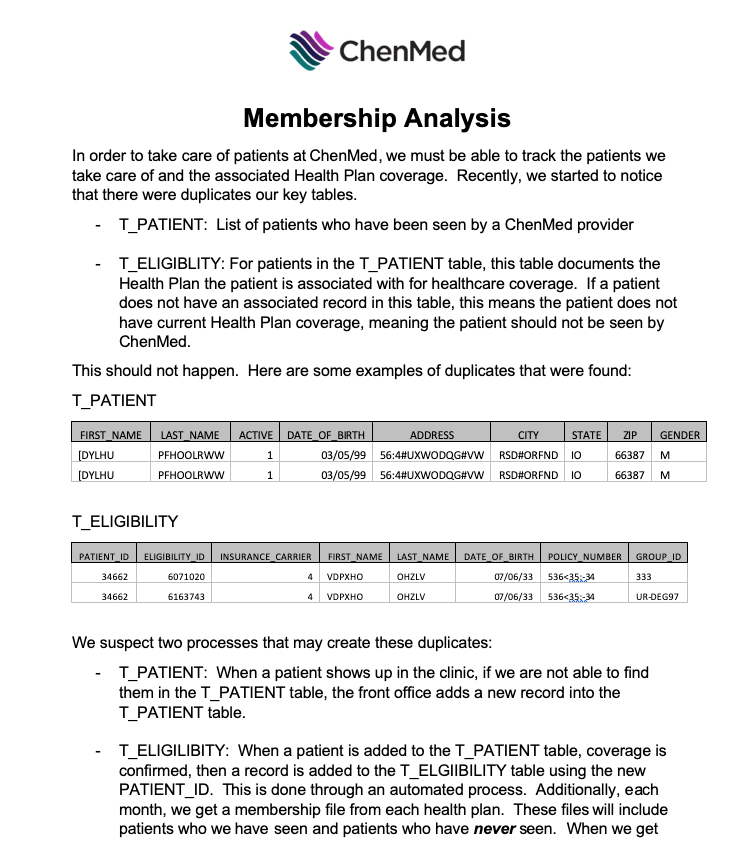

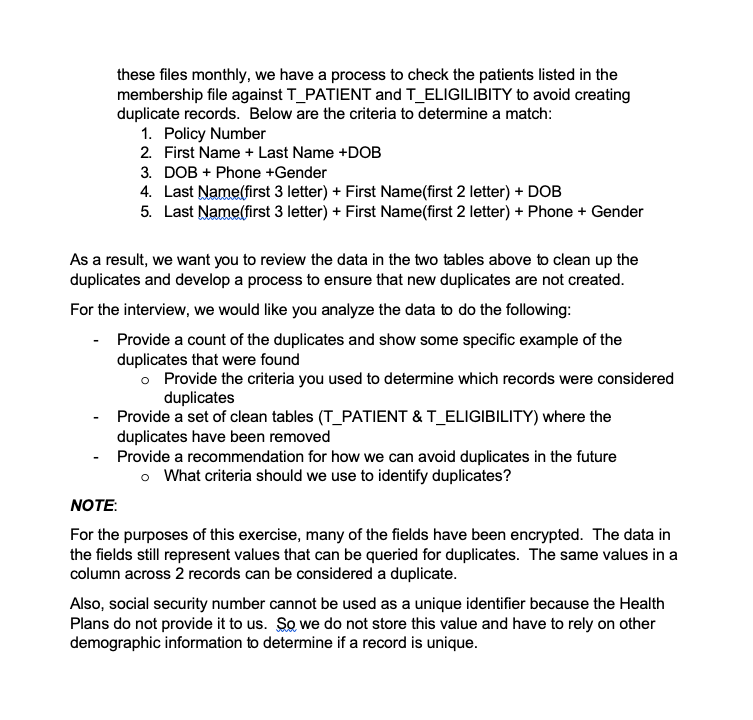

In [1]:
import pandas as pd
import numpy as np
import pandas_dedupe #dedup propsal

In [2]:
t_patient = pd.read_csv('/Users/nicholasbradford/Desktop/InterviewPrep/ChenMed/T_PATIENT.csv')
t_elig = pd.read_csv('/Users/nicholasbradford/Desktop/InterviewPrep/ChenMed/T_ELIGIBILITY.csv')

In [8]:
list(t_patient.columns)

['PATIENT_ID',
 'OFFICE_ID',
 'ACTIVE',
 'FIRST_NAME',
 'LAST_NAME',
 'DATE_OF_BIRTH',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'GENDER']

In [7]:
list(t_elig.columns)

['ELIGIBILITY_ID',
 'PATIENT_ID',
 'INSURANCE_CARRIER',
 'FIRST_NAME',
 'LAST_NAME',
 'DATE_OF_BIRTH',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'PHONE',
 'POLICY_NUMBER',
 'GROUP_ID',
 'GENDER',
 'OFFICE_ID']

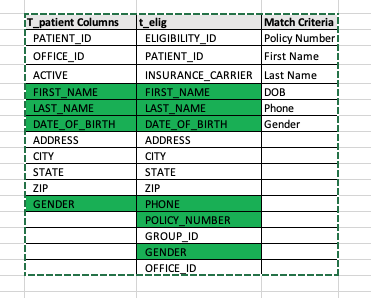

In [9]:
t_elig.sort_values('PATIENT_ID').head()

,ELIGIBILITY_ID,PATIENT_ID,INSURANCE_CARRIER,FIRST_NAME,LAST_NAME,DATE_OF_BIRTH,ADDRESS,CITY,STATE,ZIP,PHONE,POLICY_NUMBER,GROUP_ID,GENDER,OFFICE_ID
10806,6168218,20614,1,IUDQN#,PRVV,13-Aug-26,4:98#QZ#488WK#VW,RSD#ORFND,IO,663875<78,6389;;7:49,K3699;<7:33,\397:334,M,20754
10081,6167492,20677,1,XGHOO#,PLOOV,16-Jun-41,4<<35#QZ#;9WK#DYH,KLDOHDK,IO,663489<5<,638:<78576,K3347;89433,\397:334,F,20775
12993,6170417,20700,1,DOYDOLD#,HOOLV,02-Dec-26,7876#VZ#4<8WK#ZD\,PLUDPDU,IO,6635<9535,63867684:6,K73;55:9333,\398<334,F,20779
12064,6169483,20706,1,GHERUD#,ZHVW,04-Feb-60,48544#QZ#65QG#SO,PLDPL#JDUGHQV,IO,663875749,6389;;4957,K434534::33,\397:334,F,20775
10574,6167986,20728,1,GHOUR\#,ILVKHU,29-Dec-26,4:444#QZ#<WK#SO,PLDPL,IO,6649<8585,638958487:,K3588587933,\397:334,M,20775


In [10]:
t_patient.sort_values('PATIENT_ID').head()

,PATIENT_ID,OFFICE_ID,ACTIVE,FIRST_NAME,LAST_NAME,DATE_OF_BIRTH,ADDRESS,CITY,STATE,ZIP,GENDER
0,20592,20755,1,Fkulvwlqh,P|huv,01-Aug-43,939#VZ#:9wk#Dyh,Qruwk#Odxghugdoh,IO,6639;,F
1,20598,20754,1,Fduo,Vhqvderxjk,03-Jan-28,;;:4#Q1z1#9wk#Vw1,Shpeurnh#Slqhv,IO,66357,M
2,20601,20754,1,Gdylg,Vwdoozruwk,14-Apr-26,Pdloer{#884;:8,Rsd#Orfnd/,IO,663880379<,M
3,20614,20754,1,IUDQN#fdoo#diwhu#43,PRVV,13-Aug-26,4:98#QZ#488wk#Vw,Pldpl#Jdughqv,IO,66387,M
4,20615,20916,1,Mlpp|,Nrr,18-Apr-40,96:8#Vz#73vw,Pldpl,IO,66488,M


In [19]:
print('t_elig unique patient ID # {}'.format(t_elig.PATIENT_ID.nunique())) #Check if patient ID is a unique identifier
print('t_patient unique patient ID # {}'.format(t_patient.PATIENT_ID.nunique()))

t_elig unique patient ID # 65273
t_patient unique patient ID # 65534


In [21]:
len(t_patient[t_patient['PATIENT_ID'].isin(t_elig['PATIENT_ID'])].sort_values('PATIENT_ID'))

6821

***Note:*** We can see there are only 6489 matches between the 2 tables thus we should focus on patients that can be seen by ChenMed.

In [22]:
t_elig[t_elig['PATIENT_ID'].isin(t_patient['PATIENT_ID'])].sort_values('PATIENT_ID')

,ELIGIBILITY_ID,PATIENT_ID,INSURANCE_CARRIER,FIRST_NAME,LAST_NAME,DATE_OF_BIRTH,ADDRESS,CITY,STATE,ZIP,PHONE,POLICY_NUMBER,GROUP_ID,GENDER,OFFICE_ID
10806,6168218,20614,1,IUDQN#,PRVV,13-Aug-26,4:98#QZ#488WK#VW,RSD#ORFND,IO,663875<78,6389;;7:49,K3699;<7:33,\397:334,M,20754
10081,6167492,20677,1,XGHOO#,PLOOV,16-Jun-41,4<<35#QZ#;9WK#DYH,KLDOHDK,IO,663489<5<,638:<78576,K3347;89433,\397:334,F,20775
12993,6170417,20700,1,DOYDOLD#,HOOLV,02-Dec-26,7876#VZ#4<8WK#ZD\,PLUDPDU,IO,6635<9535,63867684:6,K73;55:9333,\398<334,F,20779
12064,6169483,20706,1,GHERUD#,ZHVW,04-Feb-60,48544#QZ#65QG#SO,PLDPL#JDUGHQV,IO,663875749,6389;;4957,K434534::33,\397:334,F,20775
10574,6167986,20728,1,GHOUR\#,ILVKHU,29-Dec-26,4:444#QZ#<WK#SO,PLDPL,IO,6649<8585,638958487:,K3588587933,\397:334,M,20775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,6196973,151077,1,UHJLQDOG,ULFH,20-Oct-46,4577#V#7WK#VW#DSW#66<,ORXLVYLOOH,N\,73536639:,835<<953:3,K3849:<:733,[44<4334,M,20818
32829,6201760,151079,1,MLP#,FRYHUVRQ,26-Aug-29,7;3<#KXQWHU#WUFH,SRZGHU#VSULQJ,JD,6345:,::376<9536,K7;99667333,\3<37334,M,20822
33137,6202071,151082,1,MDPHV#,WKUHHW,03-Mar-44,5:44#KLJK#WLGH#GU,DWODQWD,JD,6367<,737:993869,K847:33;<33,[47;<334,M,20824
32877,6201810,151084,1,VKHULVH#,DGDPV,14-Oct-57,DSW#63D,MRQHVERUR,JD,63569,737<678757,K7<7<463:33,[47;<334,F,20826


### Find suplicates  in t_elig:

I chose this table as its the only one that has the five criteria to spot duplicates as it was recommended on the statement:
    1.	Policy Number
    2.	First Name + Last Name +DOB
    3.	DOB + Phone +Gender
    4.	Last Name(first 3 letter) + First Name(first 2 letter) + DOB
    5.	Last Name(first 3 letter) + First Name(first 2 letter) + Phone + Gender


In [23]:
def find_duplicates_t_elig(t_elig):
    #build dummy columns with the matching criterias
    t_elig['ctwo'] = t_elig['FIRST_NAME'] + t_elig['LAST_NAME']+ t_elig['DATE_OF_BIRTH'] #Dummy column with criteria 2
    t_elig['cthree'] = t_elig['DATE_OF_BIRTH'] + t_elig['PHONE'] + t_elig['GENDER'] #Dummy column with criteria 3
    t_elig['cfour'] = t_elig['FIRST_NAME'].astype(str).str[:2] + t_elig['LAST_NAME'].astype(str).str[:1]+ t_elig['DATE_OF_BIRTH']#Dummy column with criteria 4
    t_elig['cfive'] = t_elig['FIRST_NAME'].astype(str).str[:2] + t_elig['LAST_NAME'].astype(str).str[:1]+ t_elig['PHONE']+ t_elig['GENDER']#Dummy column with criteria 5
    
    
    clean_t_elig = t_elig.sort_values('POLICY_NUMBER').loc[t_elig['POLICY_NUMBER'].duplicated(keep= False)]
 
    #find duplicates reccords matching each criteria
    criteriaone = t_elig.sort_values('POLICY_NUMBER').loc[t_elig['POLICY_NUMBER'].duplicated(keep= False)]
    criteriatwo = t_elig.sort_values('ctwo').loc[t_elig['ctwo'].duplicated(keep= False)]      
    criteriathree = t_elig.sort_values('cthree').loc[t_elig['cthree'].duplicated(keep= False)]
    criteriafour = t_elig.sort_values('cfour').loc[t_elig['cfour'].duplicated(keep= False)]
    criteriafive = t_elig.sort_values('cfive').loc[t_elig['cfive'].duplicated(keep= False)]
    
    clean_table = pd.concat([t_elig, criteriaone,criteriatwo, criteriathree, criteriafour, criteriafive]).drop_duplicates(keep=False)
    
    print('Total reccords before cleanup--> {}'.format(len(t_elig)))
    print('Criteria one # dupliactes--> {}'.format(len(criteriaone)))
    print('Criteria two # dupliactes--> {}'.format(len(criteriatwo)))
    print('Criteria three # dupliactes--> {}'.format(len(criteriathree)))
    print('Criteria four # dupliactes--> {}'.format(len(criteriafour)))
    print('Criteria five # dupliactes--> {}'.format(len(criteriafive)))
    print('Total reccords clean table --> {}'.format(len(clean_table)))
    
        
    return clean_table
    
t_elig_clean = find_duplicates_t_elig(t_elig)   

Total reccords before cleanup--> 65534
Criteria one # dupliactes--> 482
Criteria two # dupliactes--> 94
Criteria three # dupliactes--> 9895
Criteria four # dupliactes--> 562
Criteria five # dupliactes--> 9632
Total reccords clean table --> 55054


As we can see about **10k** reccords meet the duplicate criteria for this table.

In [25]:
clean_tpatient = t_patient[t_patient['PATIENT_ID'].isin(t_elig_clean['PATIENT_ID'])].sort_values('PATIENT_ID')
len(clean_tpatient)

6489

In [30]:
#use clean t_elig to find elegible patients on the t-patient table
t_elig_clean.to_csv('T_ELIGIBILITY_CLEAN.csv')
clean_tpatient.to_csv('T_PATIENT_CLEAN.csv')

### Summary

As the only interest is to find eligible patients the clean t_patients table has only eligible patients that don't have duplicates. The way I identified the duplicates was through a concatenation of the columns that met the criteria for the duplicate and as the code identified new duplicates it will remove them from the data frame.


### Recommendations

As we only care about patients that are eligible so we can use the T-eligibility table to serve as the master for t-patient. Thus finding and maintaining the data integrity of the t-eligibility will be easier as it contains all of the fields that define the duplicate criteria.

On the other hand, if it is not possible to turn the process upside down we might be able to identify duplicates to be able to use record linkage (through clustering) that might provide a certain confidence interval duplicate values within each of the data frames.  These techniques offer the following:

    - Ability to define the types of matches for each column based on the column data types
    - Use “blocks” to limit the pool of potential matches
    - Provides ranking of the matches using a scoring algorithm
    - Multiple algorithms for measuring string similarity
    - Supervised and unsupervised learning approaches
    - Multiple data cleaning methods

### Python Record Linkage Toolkit - Sample

This package works with clustering algorithms and gives a confidence interval on whether it thinks its a duplicate or not. If a record has multiple clusters ID's it will flag it as a duplicate. The technique used here is called fuzzy deduplication which looks for string similarity. 

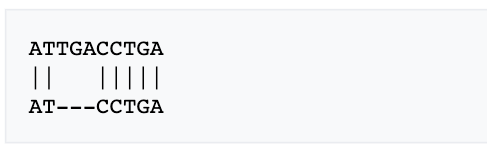

In [26]:
t_eligdedup = pandas_dedupe.dedupe_dataframe(t_elig,['POLICY_NUMBER',
                                                     'FIRST_NAME', 
                                                     'LAST_NAME', 
                                                     'DATE_OF_BIRTH',
                                                     'GENDER', 
                                                     'PHONE'])


Importing data ...
Reading from dedupe_dataframe_learned_settings
Clustering...
# duplicate sets 65142


In [27]:
len(t_eligdedup)

65534

In [ ]:
#t_eligdedup.to_csv('t_eligdedup_test.csv')

In [29]:
duplitelig_df = t_eligdedup.sort_values(['confidence','cluster id']).loc[t_eligdedup['cluster id'].duplicated(keep= False)]

duplitelig_df

,ELIGIBILITY_ID,PATIENT_ID,INSURANCE_CARRIER,FIRST_NAME,LAST_NAME,DATE_OF_BIRTH,ADDRESS,CITY,STATE,ZIP,...,POLICY_NUMBER,GROUP_ID,GENDER,OFFICE_ID,ctwo,cthree,cfour,cfive,cluster id,confidence
21311,6186282,141904,1,ehuqhww,jodvshu,11-apr-47,:93pruhovw,qhzruohdqv,od,:345665:,...,k8:7747533,4:::334,f,20808,ehuqhwwjodvshu11-apr-47,11-apr-478376355397f,ehj11-apr-47,ehj8376355397f,303,0.403000
21312,6186283,141905,1,hxjhqh,jodvshu,15-mar-44,:93pruhovw,qhzruohdqv,od,:345665:,...,k8:774733,4:::334,m,20808,hxjhqhjodvshu15-mar-44,15-mar-448376355397m,hxj15-mar-44,hxj8376355397m,303,0.403000
8892,6164904,63866,4,hxjhqh,krzdug,11-aug-42,6434qz4:8wkvw,pldpl,io,66389,...,73647-34,ur-deg43,m,20755,hxjhqhkrzdug11-aug-42,11-aug-42:955667:m,hxk11-aug-42,hxk:955667:m,277,0.407030
8893,6164905,63870,4,oloolh,krzdug,17-mar-42,6434qz4:8wkvw,pldpl,io,66389,...,73648-34,ur-deg43,f,20755,oloolhkrzdug17-mar-42,17-mar-42:955667:f,olk17-mar-42,olk:955667:f,277,0.407030
8679,6164690,1017334,4,dodq,zhlqvwrfn,17-aug-49,:53vz53wkvw,pldpl,io,66488,...,688:-34,ur-deg43,m,20803,dodqzhlqvwrfn17-aug-49,17-aug-4987565:87m,doz17-aug-49,doz87565:87m,264,0.411554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34686,6203635,1063486,1,ohrqdug,edughq,27-jan-51,4634rdnylhzugdswi5,ghfdwxu,jd,63363757,...,k997557733,\337334,m,20823,ohrqdugedughq27-jan-51,27-jan-51m,ohe27-jan-51,ohem,292,1.000000
18932,6183871,961794,1,ehww\,urjhuv,30-mar-33,None,None,None,None,...,k:36:635633,3,f,20816,ehww\urjhuv30-mar-33,30-mar-33:3493847f,ehu30-mar-33,ehu:3493847f,294,1.000000
26909,6192403,961794,1,ehww\,urjhuv,30-mar-33,49734riruggu,kduyh\,lo,93757:8,...,k:36:635633,46334,f,20816,ehww\urjhuv30-mar-33,30-mar-33:354557f,ehu30-mar-33,ehu:354557f,294,1.000000
18936,6183877,941682,1,gdylg,urjhuv,19-jun-49,None,None,None,None,...,k:5674433,\357334,m,20808,gdylgurjhuv19-jun-49,19-jun-49837743436m,gdu19-jun-49,gdu837743436m,296,1.000000


The average confidence interval is **0.911%**

In [ ]:
#t_eligdedup.to_csv('t_eligdedup_test.csv')